In [22]:
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt
import seaborn as sns

import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 

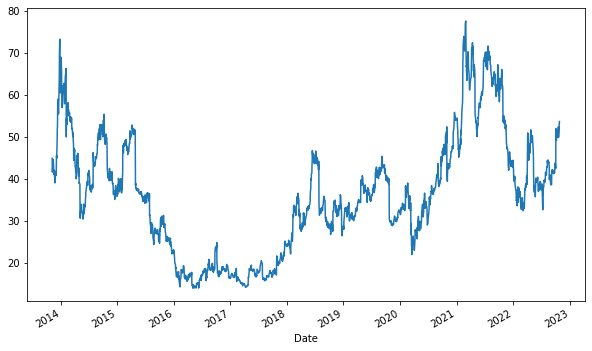

In [2]:
df = web.DataReader('TWTR', 'yahoo', start='2013-01-01', end='2022-12-14')
df['Close'].plot(figsize=(10, 6))

In [3]:
csvlink = 'https://raw.githubusercontent.com/nonviolent-action-lab/crowd-counting-consortium/master/ccc_compiled.csv'
crowd = pd.read_csv(csvlink, encoding='latin1')
crowd

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,21,23,25,29,30,31,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,locality,state,location_detail,online,type,title,macroevent,actors,organizations,...,source_28,source_29,source_30,notes,lat,lon,resolved_locality,resolved_county,resolved_state,fips_code
0,2017-01-01,Minneapolis,MN,U.S. Bank Stadium,0.0,protest; banner drop,NaN,NaN,general protestors,NaN,...,NaN,NaN,NaN,hung banner from stadium roof during NFL game,44.977753,-93.265011,Minneapolis,Hennepin County,MN,27053.0
1,2017-01-03,Palmetto Bay,FL,Palmetto Bay Police Station,0.0,demonstration,NaN,NaN,"Local pastors, family of Jamal Rollins",NaN,...,NaN,NaN,NaN,NaN,25.621772,-80.324775,Palmetto Bay,Miami-Dade County,FL,12086.0
2,2017-01-03,Astoria,OR,NaN,0.0,strike,NaN,NaN,"Oregon Dungeness Crab Commission, West Coast C...",NaN,...,NaN,NaN,NaN,strike involved crabbers across Northwest coas...,46.187884,-123.831253,Astoria,Clatsop County,OR,41007.0
3,2017-01-04,Ypsilanti,MI,Eastern Michigan University,0.0,protest,NaN,NaN,"EMU's NAACP Chapter, EMU students",NaN,...,NaN,NaN,NaN,NaN,42.241150,-83.612994,Ypsilanti,Washtenaw County,MI,26161.0
4,2017-01-04,Selfridge,ND,prairie near Cannonball and Missouri Rivers,0.0,protest; occupying land,NaN,NaN,protestors fighting the establishment of the D...,NaN,...,NaN,NaN,NaN,location is approximation based on descriptions,46.041389,-100.925130,Selfridge,Sioux County,ND,38085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127579,2022-11-27,Concord,NH,New Hampshire State House,0.0,rally,Gathering at the Capital,NaN,NaN,NaN,...,NaN,NaN,NaN,Gathering at the Capital last Sunday each mont...,43.208137,-71.537572,Concord,Merrimack County,NH,33013.0
127580,2022-11-29,San Juan,PR,Calle Fortaleza,0.0,demonstration,Rompamos el Contrato,NaN,Jornada SALP,Jornada SALP,...,NaN,NaN,NaN,Rompamos el Contrato,18.465539,-66.105735,San Juan,El Cinco,San Juan,72000.0
127581,NaN,Long Beach,CA,Robert A. Millikan High School,0.0,walkout,NaN,20180420-nationalschoolwalkout,students,NaN,...,NaN,NaN,NaN,NaN,33.770050,-118.193740,Long Beach,Los Angeles County,CA,6037.0
127582,NaN,Smithtown,NY,NaN,0.0,protest,NaN,NaN,general protesters,NaN,...,NaN,NaN,NaN,NaN,40.855931,-73.200669,Smithtown,Suffolk County,NY,36103.0


In [4]:
crowd = crowd.dropna(subset=['date'])
crowd['Date'] = pd.to_datetime(crowd['date'])
crowd['Date'].min()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Timestamp('2017-01-01 00:00:00')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


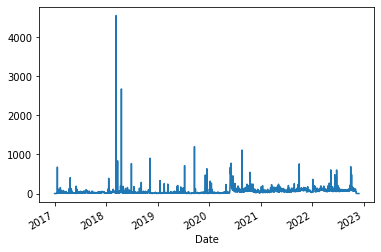

In [5]:
crowd['event'] = 1
crowd.groupby('Date')['event'].sum().plot()
datedf = crowd.groupby('Date')['event'].sum()

In [6]:
weekly_twtr = df['2017-01-01':].resample('W').mean()
weekly_twtr

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-08,17.022501,16.655000,16.740000,16.8900,14679341.75,16.8900
2017-01-15,17.597000,17.174000,17.339999,17.3600,11422688.20,17.3600
2017-01-22,17.070000,16.725000,16.997500,16.8600,13349916.00,16.8600
2017-01-29,16.859580,16.540000,16.730000,16.6480,11480115.20,16.6480
2017-02-05,17.694000,16.996000,17.282000,17.4380,19830024.00,17.4380
...,...,...,...,...,...,...
2022-10-02,43.411980,41.891000,42.344000,42.6880,16030038.80,42.6880
2022-10-09,49.854000,46.482000,47.394000,48.8820,48198419.60,48.8820
2022-10-16,50.769041,49.787860,49.998000,50.2320,14888853.00,50.2320


In [7]:
weekly_twtr['change'] = weekly_twtr['Close'].pct_change()
weekly_twtr[['Close', 'change']]

,Close,change
Date,,
2017-01-08,16.8900,NaN
2017-01-15,17.3600,0.027827
2017-01-22,16.8600,-0.028802
2017-01-29,16.6480,-0.012574
2017-02-05,17.4380,0.047453
...,...,...
2022-10-02,42.6880,0.028181
2022-10-09,48.8820,0.145099
2022-10-16,50.2320,0.027618


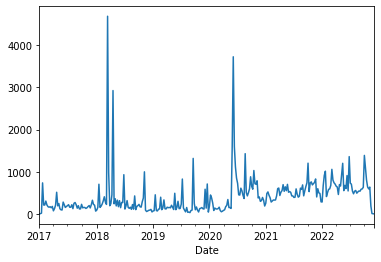

In [8]:
crowd_week = crowd.set_index('Date').resample('W').sum()
crowd_week['event'].plot()


In [9]:
crowd_week = crowd_week[['event', 'size_mean', 'injuries_crowd_any', 'arrests_any', 'property_damage_any']]
crowd_week.describe()

,event,size_mean,injuries_crowd_any,arrests_any,property_damage_any
count,310.000000,3.100000e+02,310.000000,310.000000,310.000000
mean,411.551613,1.048080e+05,2.445161,8.990323,2.841935
std,452.843210,3.859980e+05,7.173885,18.332684,13.291024
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,148.250000,1.323650e+04,0.000000,3.000000,0.000000
50%,288.000000,2.378900e+04,1.000000,5.500000,0.000000
75%,556.000000,5.240850e+04,2.000000,9.000000,2.000000
max,4683.000000,4.373770e+06,91.000000,220.000000,213.000000


In [10]:
weekly = weekly_twtr.merge(crowd_week, on='Date', how='right')
weekly

,High,Low,Open,Close,Volume,Adj Close,change,event,size_mean,injuries_crowd_any,arrests_any,property_damage_any
Date,,,,,,,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,0,1,0
2017-01-08,17.022501,16.655,16.740000,16.890,14679341.75,16.890,NaN,8,5107.0,0,0,0
2017-01-15,17.597000,17.174,17.339999,17.360,11422688.20,17.360,0.027827,20,4449.0,0,0,0
2017-01-22,17.070000,16.725,16.997500,16.860,13349916.00,16.860,-0.028802,736,4373770.0,2,5,3
2017-01-29,16.859580,16.540,16.730000,16.648,11480115.20,16.648,-0.012574,212,116705.0,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636,52152.0,1,4,1
2022-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188,10952.0,0,1,0
2022-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.0,0,0,0


In [11]:
cols_to_shift = ['event', 'size_mean', 'injuries_crowd_any', 'arrests_any','property_damage_any']
for c in cols_to_shift:
  weekly[c + "_lastweek"] =  weekly[c].shift(periods=1)

In [12]:
weekly.dropna(subset=['change'], inplace=True)


In [13]:
weekly

,High,Low,Open,Close,Volume,Adj Close,change,event,size_mean,injuries_crowd_any,arrests_any,property_damage_any,event_lastweek,size_mean_lastweek,injuries_crowd_any_lastweek,arrests_any_lastweek,property_damage_any_lastweek
Date,,,,,,,,,,,,,,,,,
2017-01-15,17.597000,17.174000,17.339999,17.3600,11422688.2,17.3600,0.027827,20,4449.0,0,0,0,8.0,5107.0,0.0,0.0,0.0
2017-01-22,17.070000,16.725000,16.997500,16.8600,13349916.0,16.8600,-0.028802,736,4373770.0,2,5,3,20.0,4449.0,0.0,0.0,0.0
2017-01-29,16.859580,16.540000,16.730000,16.6480,11480115.2,16.6480,-0.012574,212,116705.0,2,6,1,736.0,4373770.0,2.0,5.0,3.0
2017-02-05,17.694000,16.996000,17.282000,17.4380,19830024.0,17.4380,0.047453,211,105415.0,3,6,1,212.0,116705.0,2.0,6.0,1.0
2017-02-12,17.706000,17.041000,17.496000,17.3800,51928616.8,17.3800,-0.003326,305,110582.0,0,10,1,211.0,105415.0,3.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-02,43.411980,41.891000,42.344000,42.6880,16030038.8,42.6880,0.028181,1387,158936.0,1,1,0,632.0,49942.0,1.0,4.0,1.0
2022-10-09,49.854000,46.482000,47.394000,48.8820,48198419.6,48.8820,0.145099,1084,154052.0,3,6,1,1387.0,158936.0,1.0,1.0,0.0
2022-10-16,50.769041,49.787860,49.998000,50.2320,14888853.0,50.2320,0.027618,801,123424.0,0,4,2,1084.0,154052.0,3.0,6.0,1.0


## Modeling

In [23]:

# Load the data
X, y = weekly[['event_lastweek', 'size_mean_lastweek',
              'injuries_crowd_any_lastweek', 'arrests_any_lastweek',
              'property_damage_any_lastweek']], weekly['change']
 
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 7)
 


xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 7)
 
xgb_r.fit(train_X, train_y)
 
pred = xgb_r.predict(test_X)

rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[04:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.183249


In [30]:
from sklearn.model_selection import GridSearchCV


regressor=xg.XGBRegressor(objective ='reg:squarederror',eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================

# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_X, train_y)

print("The best hyperparameters are ",search.best_params_)


The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [35]:
regressor=xg.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

regressor.fit(train_X, train_y)
predictions = regressor.predict(test_X)

rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[05:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.183249


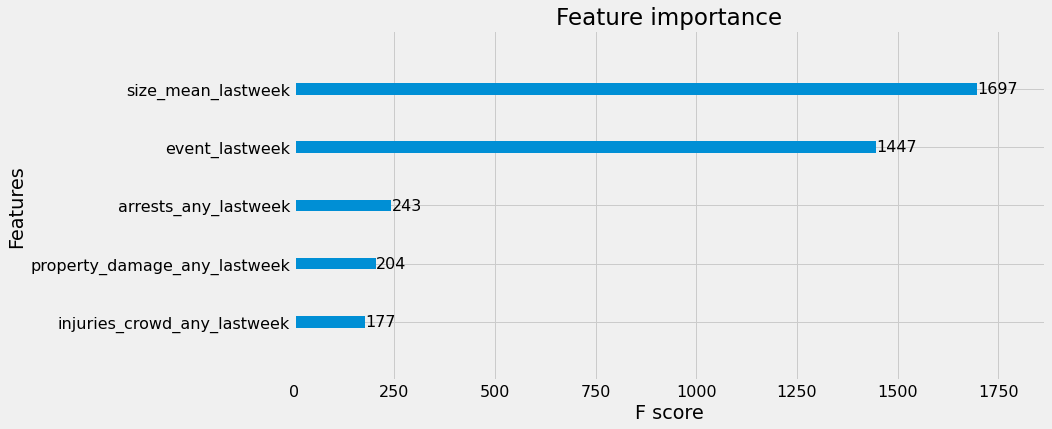

In [37]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=8, ax=ax)
plt.show();

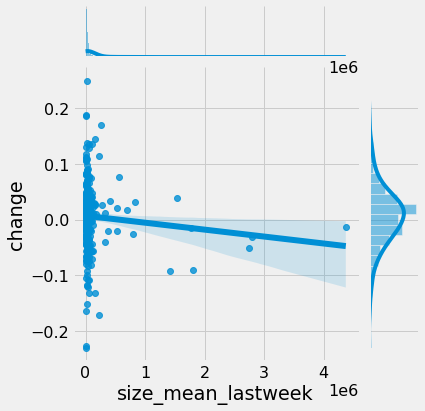

In [47]:
sns.jointplot(data=weekly, x='size_mean_lastweek', y='change',kind='reg' )

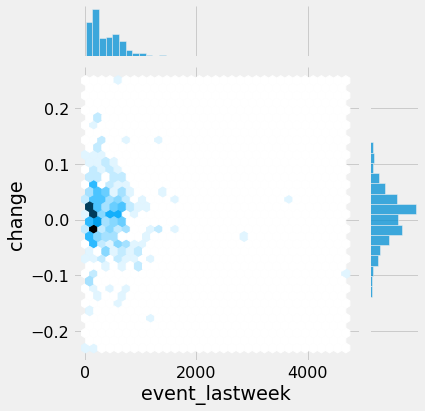

In [49]:
sns.jointplot(data=weekly, x='event_lastweek', y='change',kind='hex' )

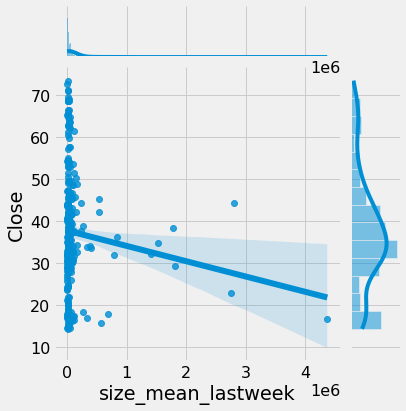

In [50]:
sns.jointplot(data=weekly, x='size_mean_lastweek', y='Close',kind='reg' )

## Make it classifier?

In [60]:
weekly['binary_change'] = np.where(weekly['change']>0, 1, 0)
weekly[['binary_change', 'change']]

,binary_change,change
Date,,
2017-01-15,1,0.027827
2017-01-22,0,-0.028802
2017-01-29,0,-0.012574
2017-02-05,1,0.047453
2017-02-12,0,-0.003326
...,...,...
2022-10-02,1,0.028181
2022-10-09,1,0.145099
2022-10-16,1,0.027618


In [55]:
X, y = weekly[['event_lastweek', 'size_mean_lastweek',
              'injuries_crowd_any_lastweek', 'arrests_any_lastweek',
              'property_damage_any_lastweek']], weekly['binary_change']
 
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 7)
 

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('XGB', xg.XGBClassifier()))


In [75]:
results = []
for m in models:
  m[1].fit(train_X, train_y)
  predictions = m[1].predict(test_X)

  recall = recall_score(test_y, predictions)
  precision = precision_score(test_y, predictions)
  accuracy = accuracy_score(test_y, predictions)
  results.append((m[0], recall, precision, accuracy))
  

In [76]:
results

[('LDA', 0.7592592592592593, 0.6029411764705882, 0.5604395604395604),
 ('KNN', 0.5185185185185185, 0.5283018867924528, 0.43956043956043955),
 ('CART', 0.5, 0.5869565217391305, 0.4945054945054945),
 ('NB', 0.07407407407407407, 0.6666666666666666, 0.42857142857142855),
 ('RF', 0.5, 0.6, 0.5054945054945055),
 ('MLP', 0.037037037037037035, 0.2857142857142857, 0.37362637362637363),
 ('SVM', 1.0, 0.5934065934065934, 0.5934065934065934),
 ('LR', 0.9259259259259259, 0.5952380952380952, 0.5824175824175825),
 ('XGB', 0.4074074074074074, 0.5238095238095238, 0.42857142857142855)]

Text(0.5, 1.05, 'Confusion Matrix')

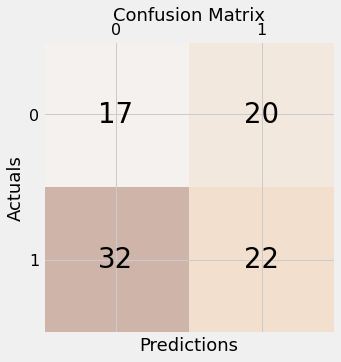

In [77]:
conf_matrix = confusion_matrix(y_true=test_y, y_pred=predictions)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

# Leader data

In [14]:
leader = pd.read_csv('https://raw.githubusercontent.com/JELambert/Psych_Agg/master/data/csv/leader_lta.csv')
leader_year = pd.read_csv('https://raw.githubusercontent.com/JELambert/Psych_Agg/master/data/csv/year_lta.csv')
leader

,lastname,firstname,Ccode,Word Count,distrust,task,bace,igb,sc,cc,power,name
0,Abacha,Sani,475,4238,0.086022,0.707006,0.285714,0.133333,0.235294,0.474654,0.353659,Sani Abacha
1,Adams,John,2,12463,0.223350,0.477612,0.253247,0.164773,0.267857,0.639676,0.358974,John Adams
2,Adams,JohnQuincy,2,34890,0.149406,0.629776,0.172043,0.125333,0.205128,0.647358,0.292308,JohnQuincy Adams
3,al-Assad,Bashar,652,123997,0.221726,0.575184,0.338638,0.161033,0.358847,0.596858,0.269667,Bashar al-Assad
4,al-Bashir,Omar,625,8919,0.245968,0.686275,0.338462,0.132353,0.239130,0.550781,0.300000,Omar al-Bashir
...,...,...,...,...,...,...,...,...,...,...,...,...
125,Wilson,Woodrow,2,68122,0.286076,0.575143,0.332150,0.147270,0.360841,0.530143,0.313920,Woodrow Wilson
126,Yabuku,Gowon,475,4976,0.164062,0.552632,0.314286,0.263158,0.316667,0.450549,0.338235,Gowon Yabuku
127,Yeltsin,Boris,365,8938,0.074349,0.575521,0.404255,0.105263,0.411392,0.601411,0.277778,Boris Yeltsin
128,Zedong,Mao,710,151363,0.261808,0.627533,0.381014,0.105368,0.448211,0.632410,0.263875,Mao Zedong


In [15]:
leader_year

,lastname,firstname,Ccode,Word Count,year,distrust,task,bace,igb,sc,cc,power,name
0,Adams,John,2,7417,1797,0.229008,0.465000,0.240964,0.190476,0.324324,0.637860,0.364706,John Adams
1,Adams,JohnQuincy,2,12128,1825,0.182243,0.574324,0.207317,0.100671,0.170213,0.620183,0.258824,JohnQuincy Adams
2,Adams,JohnQuincy,2,8015,1826,0.078261,0.678788,0.152174,0.135922,0.444444,0.677083,0.266667,JohnQuincy Adams
3,Adams,JohnQuincy,2,7228,1827,0.155556,0.658065,0.090909,0.315789,0.250000,0.662379,0.440000,JohnQuincy Adams
4,Adams,JohnQuincy,2,7519,1828,0.152000,0.657343,0.166667,0.070588,0.142857,0.643505,0.300000,JohnQuincy Adams
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Zedong,Mao,710,5982,1963,0.188000,0.607143,0.351852,0.130952,0.340909,0.665706,0.333333,Mao Zedong
557,Zedong,Mao,710,10464,1964,0.189504,0.681818,0.406639,0.085859,0.340909,0.691525,0.268085,Mao Zedong
558,Zedong,Mao,710,11515,1965,0.384030,0.673469,0.340824,0.118812,0.439252,0.629932,0.210117,Mao Zedong
559,Zedong,Mao,710,6512,1967,0.161702,0.593023,0.416216,0.080882,0.316832,0.688787,0.222857,Mao Zedong
